# Creation of Intelligent Regression based data model to predict house / home prices on basis of sales data in Seattle region from 2014 to 2015. Data models take into account various features like area, location, amenities and condition

#### Import of all libraries

In [60]:
%matplotlib inline
# all the basic libraries that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# pre-processing method
from sklearn.model_selection import train_test_split

# the regression models 
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor

# methods and classes for evaluation
# from sklearn import metrics
# from sklearn.model_selection import cross_validate

#### Loading Dataset

In [3]:
#Using pandas method to read csv file into a dataframe
houseDataSet = pd.read_csv('innercity.csv')

In [4]:
#View first 10 rows of the dataset
houseDataSet.head(10)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450
5,5525400430,20140715T000000,585000,3,2.50,2050,11690,2.0,0,0,...,0,1989,0,98059,47.5279,-122.161,2410,10172,1,13740
6,2419600075,20141201T000000,465000,3,1.75,1480,6360,1.0,0,0,...,0,1954,0,98133,47.7311,-122.353,1480,6360,0,7840
7,114101161,20140829T000000,480000,3,1.50,2100,67269,1.0,0,0,...,880,1949,0,98028,47.7592,-122.230,1610,15999,0,69369
8,7011201550,20140707T000000,780000,4,2.00,2600,4800,1.0,0,2,...,1200,1953,0,98119,47.6370,-122.371,2050,3505,0,7400
9,7203000640,20140918T000000,215000,4,1.00,1130,7400,1.0,0,0,...,0,1969,0,98003,47.3437,-122.316,1540,7379,0,8530


#### Descriptive Information on Data Parameters
    1.cid : represents a unique ID for the house
    2.dayhours: represents when the date when the house was sold
    3.price : Selling price of the house when it was sold. This will be our target variable
    4.room_bed, room_bath : Represents number of bedrooms and bathoorms in the house respectively
    5.living_measure: represents square footage of the home, 
    6.lot_measure: represents square footage of the lot
    7.total_area: Would be the sum total of lot_measure and living_measure, hence total_area = living_measure + lot_measure
    8.living_measure15 , lot_measure15 : represents area in 2015 i.e. living room area and lot size area. 
    9.ceil: Total floors or levels in the house
    10.coast: Is a boolean variable representing wether the house has a water front or not.
    11.sight: Is another boolean variable representing wether the house has been viewed by clients or not.
    12.ceil_measure: Square footage of the house except the basement.
    13.condition: Overall condition of the house a number.
    14.Quality: Grade given to housing unit based on grading system
    15.yr_built: Year when this house was built, it basically represents the age of house.
    16.yr_renovated: Year when the house got renovated. We assume that the last renovation year is captured in the data set
    17.zipcode: simple zipcode.
    18.lat, long: Co-ordinates of the house.

## Exploratory Data Analysis (Begin)

In [5]:
#See Dataframe shape and Size 
print("Shape :",houseDataSet.shape)
print("Size (in Bytes) :",houseDataSet.size)

Shape : (21613, 23)
Size (in Bytes) : 497099


In [6]:
#Print out the datatypes for various parameters here
houseDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

#### Here from the above output we see that, "dayhours" is of type "object", rest all parameters are numbers of type either int64 or fractions float64. Also we see that there are no null values as Non-Null count is 21613 which is same as number of rows of the dataset

#### Here there are 22 Independent variables in the data set and 1 target variable i.e. price

In [7]:
#Summarization of the data or calcuating the 5 point summary i.e. the Min, 25th , 50th (Median), 75th Percentiles, Max value
houseDataSet.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [56]:
#Function Definition 
def calculate_building_age(yr_built, yr_renovated):
    if yr_renovated is not None and yr_renovated != 0:
        return datetime.now().year - yr_renovated
    else:
        return datetime.now().year - yr_built

In [61]:
#Creating new column building_age based on yr_built / yr_renovated. 
houseDataSet["building_age"] = houseDataSet.apply(lambda row : 
                                                  calculate_building_age(row['yr_built'], row['yr_renovated']),axis=1)
houseDataSet["building_age"].describe()

count    21613.000000
mean        47.613982
std         28.806854
min          6.000000
25%         22.000000
50%         44.000000
75%         67.000000
max        121.000000
Name: building_age, dtype: float64

#### From the above, description on building age it evident that in our data set oldest building being 121 years old , and newest buildings is just 6 years old from current year. Hence this gives us an insight that the data set is atleast 6 years old 

In [51]:
#Data Correlation
houseDataSet.corr()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,building_age
cid,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.010009,-0.131844,-0.017476
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,...,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456,0.565991,0.104796,-0.105724
room_bed,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.259268,0.044310,-0.165506
room_bath,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.484923,0.104050,-0.537164
living_measure,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.632947,0.194209,-0.343745
lot_measure,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.118883,0.999763,-0.052911
ceil,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.347749,0.002637,-0.505408
coast,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.069882,0.023809,0.000537
sight,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.220250,0.080693,0.018264
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.121902,-0.010219,0.396358


<AxesSubplot:>

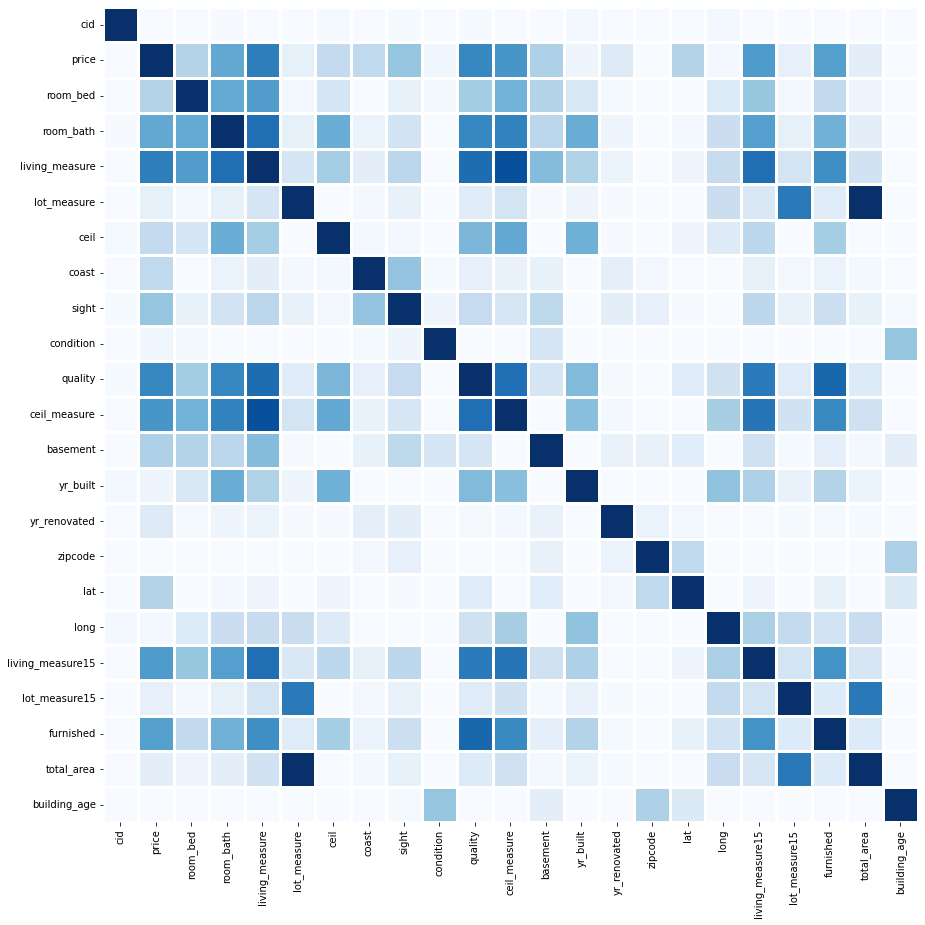

In [53]:
#Generating Heatmap which would indicate correlation among various parameters. 
plt.figure(figsize=(15,15))
sns.heatmap(houseDataSet.corr(), cbar=0, linewidths=3,vmax=1, vmin=0, square=True, cmap='Blues')

#### Decission to drop parameters from the data set such that our prediction model does not miss out on information, based on above correlation and heatmap. Here, we can select to drop all parameters with a correlation less than 0.25 with target variable 'price' 
##### "cid": 
Since this is a unique representation on house and it will not have any implication on the model. Correlation is negative
##### "dayhours": 
It represents the date house was sold, which really does not help in house price prediction also, data is in string form cannot be used in computation.
##### "zipcode": 
Looking into the data and searching the zip-code we have seen that it specifically belongs to a particular area and hence we can drop this parameter too.
##### "lot_measure" and 'lot_measure15'
Weak correlation when it comes to predict the price of the house. We can say that customers do not care on the lot_measure compare to living measure
##### "lat" and "long": 
Since they represent a 3D view of the house and buyers do not really care about the lattitude and longitude degree of the house. This would reduce the compute power needs
##### 'condition': 
Very weak correlation with price
##### 'yr_built' and 'yr_renovated': 
Both have very weak correlation when it comes to predicting price of the house
##### 'total_area'
Since it sums up both living_measure and lot_measure and since lot_measure is the bigger value and does not have a strong co-relation therefore , total_area itself has a week correlation
##### 'building_age'
We calculated building age but it seems to have a weak correlation with price too, given that yr_built and yr_renovated both have a  weak correlation. 

In [62]:
#Dropping columns and creating new dataframe
newHouseDf = houseDataSet.drop(columns=['cid', 'dayhours', 'zipcode', 'lot_measure', 'lat', 'long', 'yr_built', 'yr_renovated',
                                       'total_area', 'lot_measure15', 'condition', 'building_age'], axis=1)
newHouseDf.head(2)

,price,room_bed,room_bath,living_measure,ceil,coast,sight,quality,ceil_measure,basement,living_measure15,furnished
0,808100,4,3.25,3020,1.0,0,0,9,3020,0,2120,1
1,277500,4,2.50,2550,1.0,0,0,8,1750,800,2260,0


In [63]:
#Data Shape after dropping 11 columnsn
newHouseDf.shape

(21613, 12)

#### Regression Plots

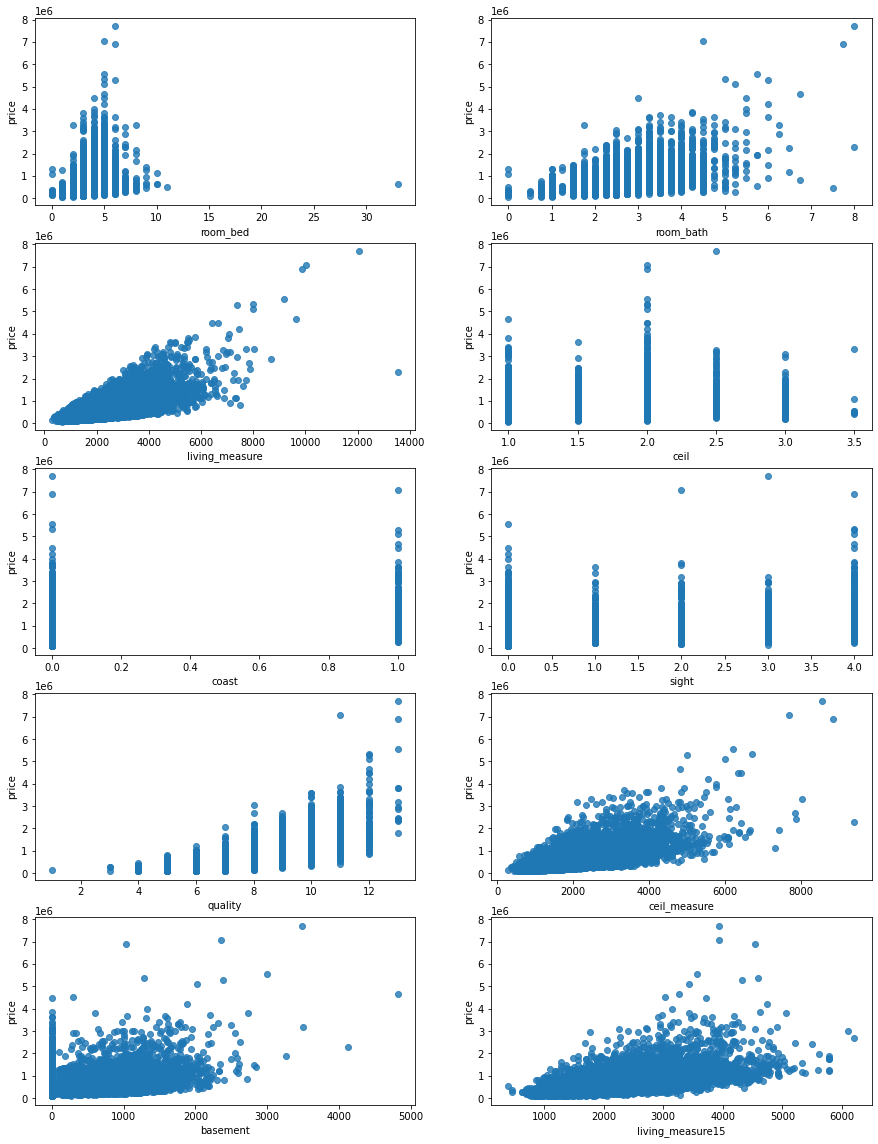

In [45]:
#Bivariate analysis to gain data insights here, using regplot
f,axes = plt.subplots(5, 2,figsize=(15,20))
sns.regplot(x='room_bed', y='price', data=newHouseDf,  ax=axes[0][0],fit_reg=False)
sns.regplot(x='room_bath', y='price', data=newHouseDf,  ax=axes[0][1], fit_reg=False)
sns.regplot(x='living_measure', y='price', data=newHouseDf,  ax=axes[1][0],fit_reg=False)
sns.regplot(x='ceil', y='price', data=newHouseDf,  ax=axes[1][1], fit_reg=False)
sns.regplot(x='coast', y='price', data=newHouseDf,  ax=axes[2][0],fit_reg=False)
sns.regplot(x='sight', y='price', data=newHouseDf,  ax=axes[2][1], fit_reg=False)
sns.regplot(x='quality', y='price', data=newHouseDf,  ax=axes[3][0],fit_reg=False)
sns.regplot(x='ceil_measure', y='price', data=newHouseDf,  ax=axes[3][1], fit_reg=False)
sns.regplot(x='basement', y='price', data=newHouseDf,  ax=axes[4][0],fit_reg=False)
sns.regplot(x='living_measure15', y='price', data=newHouseDf,  ax=axes[4][1], fit_reg=False)

plt.show()

#### BoxPlots for Outlier detection
Standardized way of displaying the distribution of data based on 5 point summary 

<AxesSubplot:xlabel='furnished', ylabel='price'>

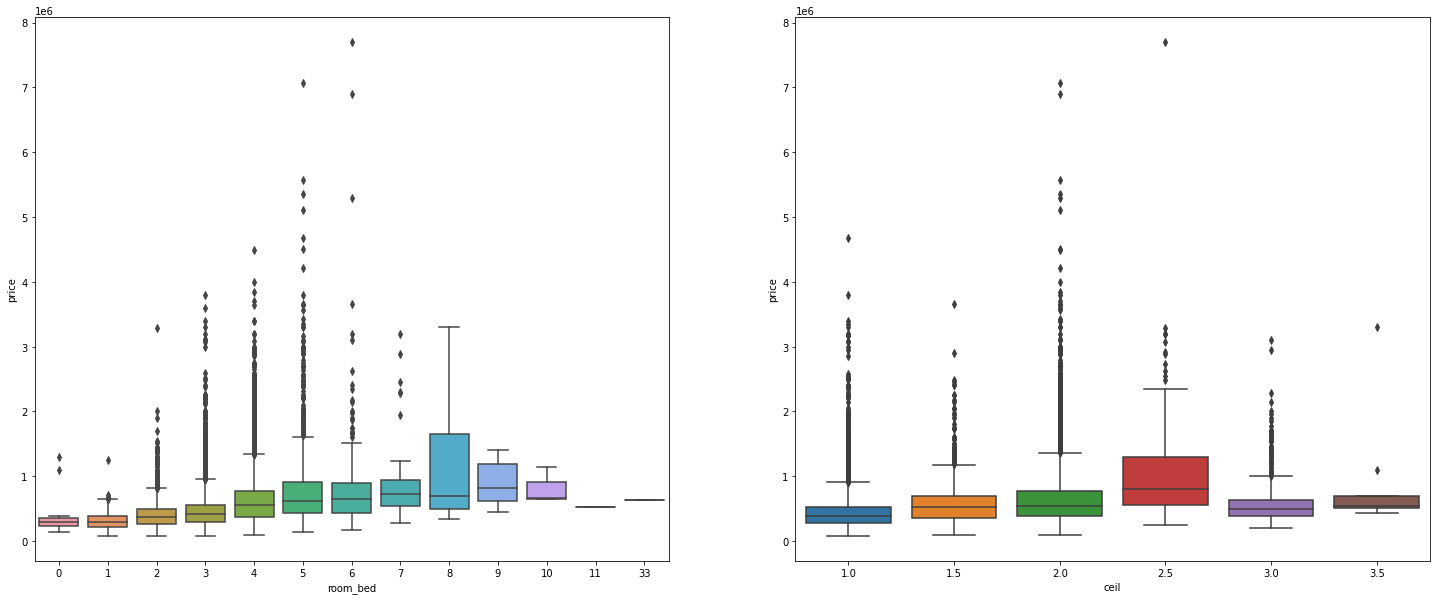

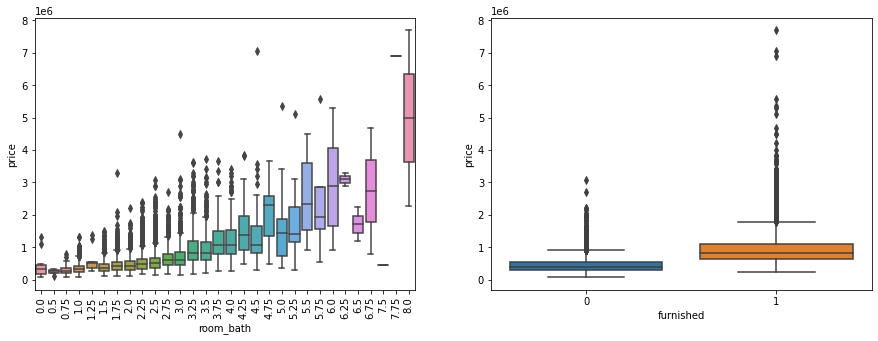

In [81]:
# Box Plot pair for number of bedrooms vs price and ceil vs price
f, axes = plt.subplots(1, 2,figsize=(25,10))
sns.boxplot(x=newHouseDf['room_bed'],y=newHouseDf['price'], ax=axes[0])
sns.boxplot(x=newHouseDf['ceil'],y=newHouseDf['price'], ax=axes[1])

#Another box plot pair for number of bathrooms vs price and is house furnished or not vs price
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=newHouseDf['room_bath'],y=newHouseDf['price'], ax=axes[0])
labels = axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
sns.boxplot(x=newHouseDf['furnished'],y=newHouseDf['price'], ax=axes[1])


#### From the above box plots we can see that many data points are in category of outliers falling above (Q3 + 1.5*IQR). Having to many outliers is not good for prediction model which eventually decreases the accuracy and increase error

#### Creation of Baseline Model (without scaling outliers)

In [88]:
#Here we are not scaling the data and trying to see the accuracy of the regression model based on the current data  itself i.e. 
#with the presence of outliers.

#Drop the dependent column that is price and assign all other columns data to X_data
X_data = newHouseDf.drop(columns=['price'], axis=1) 
Y_data = newHouseDf[['price']]


In [86]:
X_data.head(1)

,room_bed,room_bath,living_measure,ceil,coast,sight,quality,ceil_measure,basement,living_measure15,furnished
0,4,3.25,3020,1.0,0,0,9,3020,0,2120,1


In [89]:
Y_data.head(1)

,price
0,808100


In [93]:
#Splitting of Data in Training and Testing sets.

#30% of the original data would be our test sample size
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=1)
print(f'Shape of dataset :{newHouseDf.shape}')
print(f'Shape of X Train Data Set :{X_train.shape}')
print(f'Shape of X Test Data Set :{X_test.shape}')
print(f'Shape of Y Train Data Set: {Y_train.shape}')
print(f'Shape of Y Test Data Set: {Y_test.shape}')
print(f'30% of 21613 = {0.3 * 21613}')

Shape of dataset :(21613, 12)
Shape of X Train Data Set :(15129, 11)
Shape of X Test Data Set :(6484, 11)
Shape of Y Train Data Set: (15129, 1)
Shape of Y Test Data Set: (6484, 1)
30% of 21613 = 6483.9


In [97]:
#Initialize Linear Regression Model and fit with training data
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [98]:
#Checking the Score of Training data and Testing data of the regression Model
print(f'Score of Regression Model for Training Data : {lr_model.score(X_train, Y_train)}')
print(f'Score of Regression Model for Testing Data : {lr_model.score(X_test, Y_test)}')

Score of Regression Model for Training Data : 0.5977637094471728
Score of Regression Model for Testing Data : 0.5956912659228961


#### From the above score, the model accuracy is very less and it is requried to improve the accuracy from here on